## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [18]:
cards = sample_cards(100, 6, 3)
cards

array([[ 8, 10, 45],
       [ 4, 71, 97],
       [37, 39, 60],
       [ 3, 49, 84],
       [ 7, 51, 53],
       [23, 40, 63]])

and access the cards of each player with 

In [19]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 8, 10, 45]), array([ 4, 71, 97]))

The lowest card in the game is

In [20]:
np.min(cards)

3

In [21]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

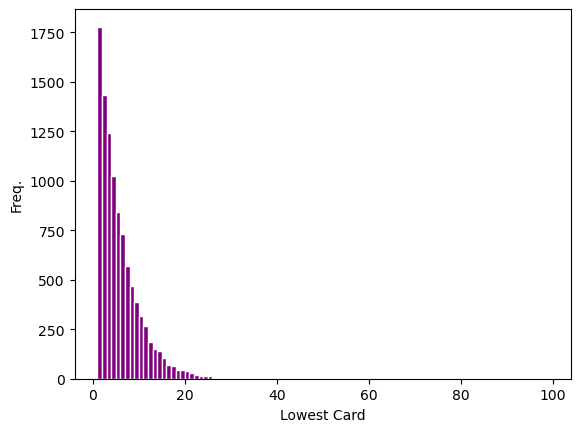

In [22]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 10000
lowest_card_array = np.zeros(num_sims)

N = 100
n = 6
k = 3

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    lowest_card_array[i] = np.min(cards)

plt.hist(lowest_card_array, bins = np.arange(1,N), edgecolor = "white",color = "purple")
plt.ylabel("Freq.")
plt.xlabel("Lowest Card")
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

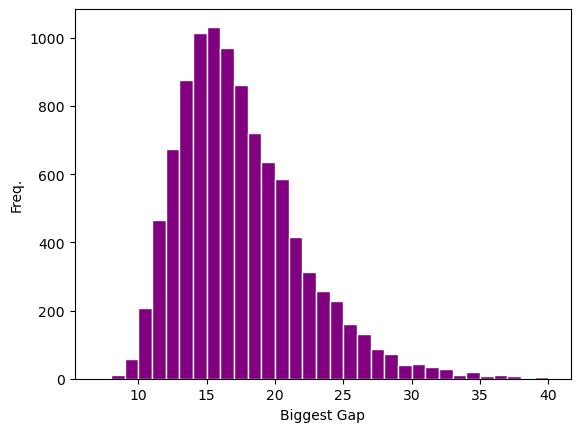

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 10000
N = 100
n = 6
k = 3
biggest_gap_array =np.zeros(num_sims)

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    all_cards =cards.flatten()
    all_cards.sort()
    gaps = np.diff(all_cards)
    biggest_gap_array[i]= np.max(gaps)

C = np.min(biggest_gap_array)
D = np.max(biggest_gap_array)

plt.hist(biggest_gap_array, bins =np.arange(C, D), color ="purple",edgecolor = 'white')
plt.ylabel("Freq.")
plt.xlabel("Biggest Gap")
plt.show()

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

maximum number of numbers that a player will have to wait before playing the next card: 99.0


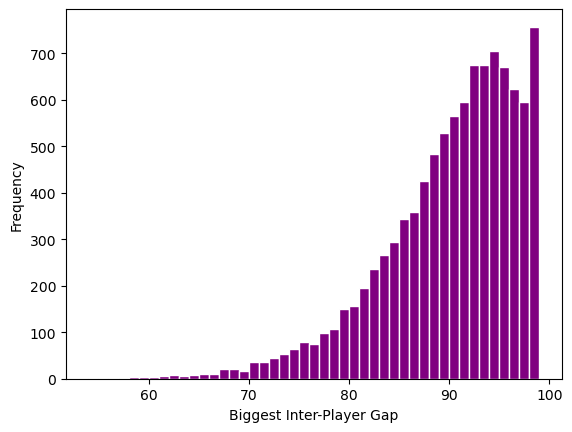

In [10]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 10000
largest_inter_player_gap_array = np.zeros(num_sims)
N = 100 
n = 6
k = 3

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    max_card_in_game = np.max(cards)
    player_with_max_card = np.argmax(np.max(cards, axis = 1))
    remaining_cards = np.delete(cards, player_with_max_card, axis = 0)
    min_remaining_card = np.min(remaining_cards)
    biggest_gap = max_card_in_game - min_remaining_card
    largest_inter_player_gap_array[i] = biggest_gap

A = np.min(largest_inter_player_gap_array)
B = np.max(largest_inter_player_gap_array)

print("maximum number of numbers that a player will have to wait before playing the next card:", np.max(largest_inter_player_gap_array))
plt.hist(largest_inter_player_gap_array, bins = np.arange(A, B + 1), edgecolor='white', color='purple')
plt.ylabel('Frequency')
plt.xlabel('Biggest Inter-Player Gap')
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

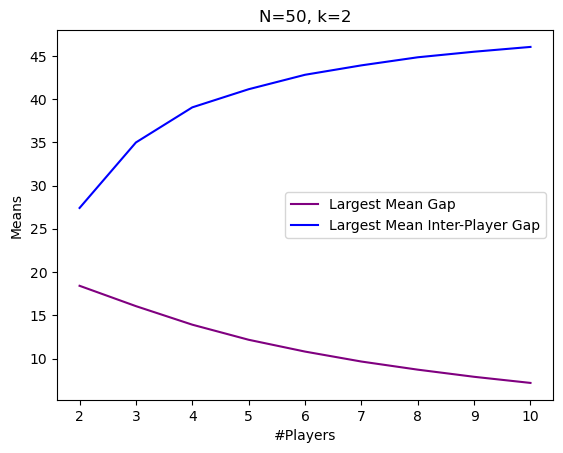

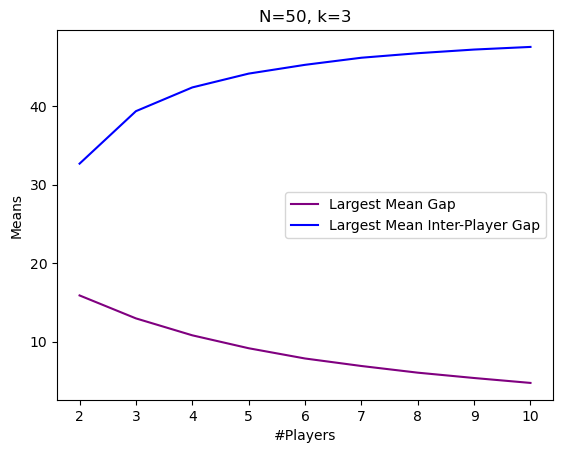

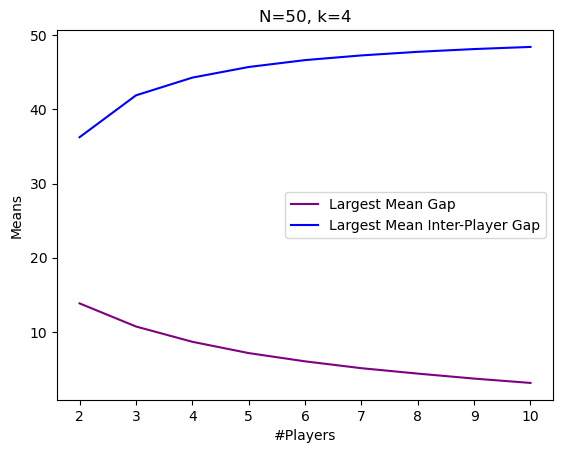

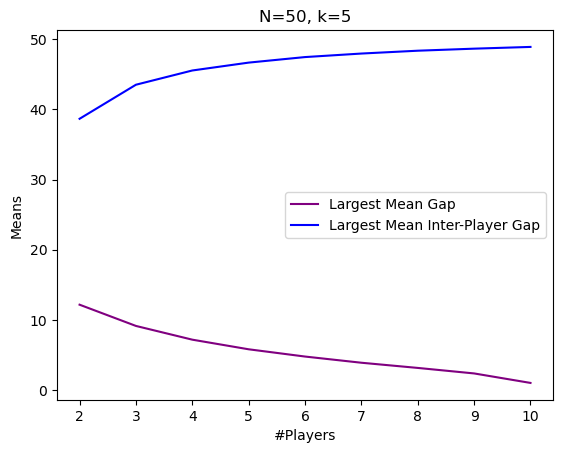

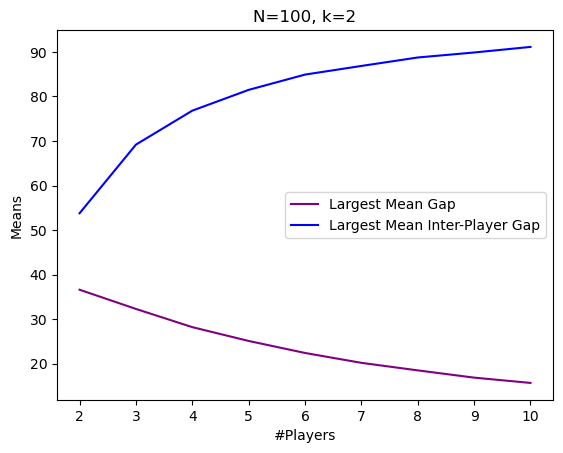

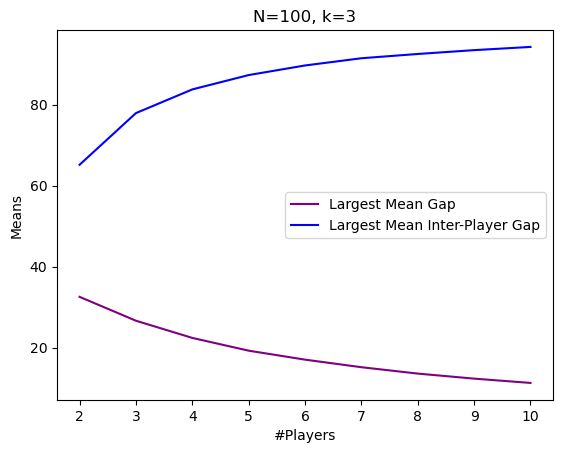

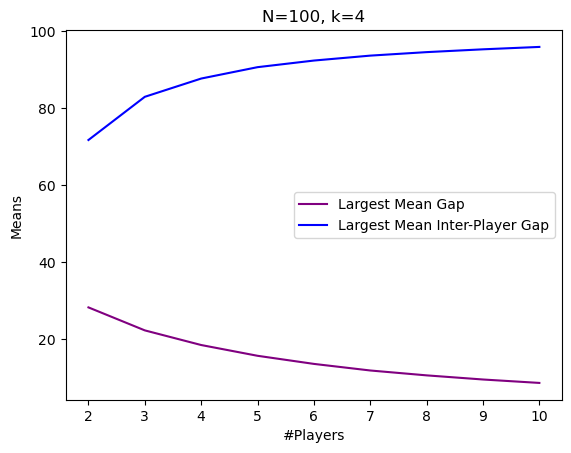

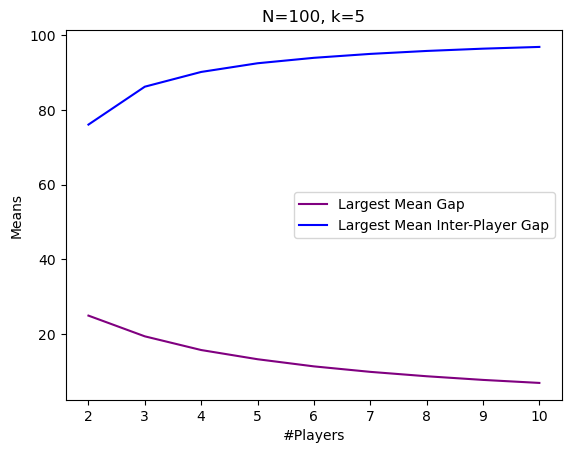

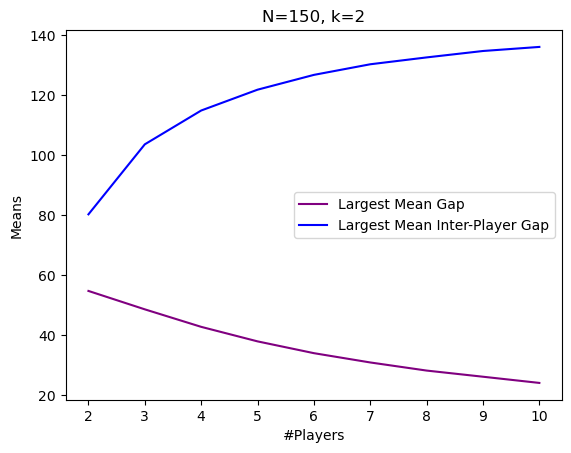

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

def get_mean_gaps(N, n, k, num_sims = 10000):
    largest_gap_array = np.zeros(num_sims)
    largest_inter_player_gap_array = np.zeros(num_sims)

    for i in range(num_sims):

        #Basically Cell 1
        cards = sample_cards(N, n, k)
        all_cards = cards.flatten()
        all_cards.sort()
        gaps = np.diff(all_cards)
        largest_gap_array[i] = np.max(gaps)
        
        #Basically Cell 2
        max_card_in_game = np.max(cards)
        player_with_max_card = np.argmax(np.max(cards, axis=1))
        remaining_cards = np.delete(cards, player_with_max_card, axis=0)
        min_remaining_card = np.min(remaining_cards)
        largest_inter_player_gap_array[i] = max_card_in_game - min_remaining_card

    #Taking the mean of the arrays
    return np.mean(largest_gap_array), np.mean(largest_inter_player_gap_array)

def analyze_difference(N, k, max_players = 10):
    differences = []
    for n in range(2, max_players + 1):
        mean_gap, mean_inter_player_gap = get_mean_gaps(N, n, k)
        differences.append(mean_inter_player_gap - mean_gap)
    return differences

N_values = [50, 100, 150, 200]
k_values = [2, 3, 4, 5]
max_players = 10

mean_gaps = []
mean_inter_player_gaps = []

for N in N_values:
    for k in k_values:
        for n in range(2, max_players + 1):
            mean_gap, mean_inter_player_gap = get_mean_gaps(N, n, k)
            
            mean_gaps.append(mean_gap)
            mean_inter_player_gaps.append(mean_inter_player_gap)
            
        plt.plot(range(2, max_players + 1), mean_gaps, label = "Largest Mean Gap", color = 'purple')
        plt.plot(range(2, max_players + 1), mean_inter_player_gaps, label = "Largest Mean Inter-Player Gap", color = 'blue')
        plt.legend()
        plt.title(f'N={N}, k={k}')
        plt.xlabel('#Players')
        plt.ylabel('Means')
        plt.show()

        mean_gaps.clear()
        mean_inter_player_gaps.clear()

Since in all of the graphs, the largest mean gap increases with the number of players and the largents mean inter-player gap decreases with the number of players, it is logical to conclude that the gap between the two metrics increases as the number of players in the game gets larger.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

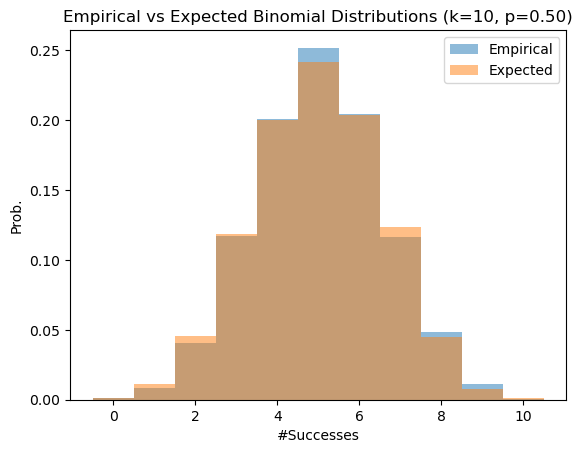

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def sample_game(N):
    return np.random.choice(N) + 1

def simulate_binomial_from_game(N, Threshold, k, num_sims = 10000):
    p = Threshold / N
    successes = []
    for lol in range(num_sims):
        count_success = sum([1 for lol in range(k) if sample_game(N) <= Threshold])
        successes.append(count_success)
    return successes, p

N = 100
Threshold = 50
k = 10
num_sims = 10000

empirical_successes, p = simulate_binomial_from_game(N, Threshold, k, num_sims)
expected_successes = np.random.binomial(k, p, num_sims)

plt.hist(empirical_successes, bins = np.arange(k + 2) - 0.5, alpha = 0.5, label = 'Empirical', density = True)
plt.hist(expected_successes, bins = np.arange(k + 2) - 0.5, alpha = 0.5, label = 'Expected', density = True)
plt.legend()
plt.title(f"Empirical vs Expected Binomial Distributions (k={k}, p={p:.2f})")
plt.xlabel("#Successes")
plt.ylabel("Prob.")
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

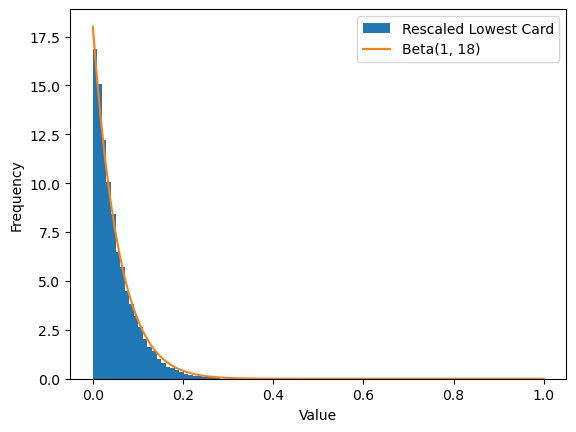

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

N = 100
n = 6
k = 3
num_sims = 10000

lowest_card_array = np.zeros(num_sims)

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    #Rescaling the lowest card to be between 0-1
    lowest_card_array[i] = np.min(cards)/N

x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 1, n*k)

plt.hist(lowest_card_array, bins = np.linspace(0, 1, 100), density = True, label = "Rescaled Lowest Card")
plt.plot(x, y, label = f"Beta(1, {n*k})")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

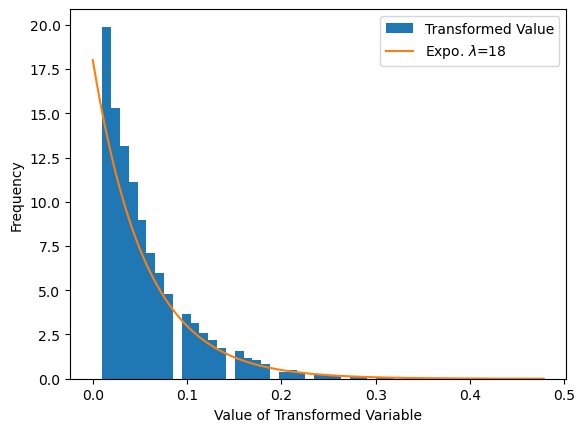

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

N = 100
n = 6
k = 3
num_sims = 10000

transformed_array = np.zeros(num_sims)

for i in range(num_sims):
    cards = sample_cards(N, n, k)
    lowest_card = np.min(cards)
    transformed_value = -(np.log(1 - lowest_card/N))
    transformed_array[i] = transformed_value

my_lambda = n*k
x = np.linspace(0, np.max(transformed_array), 1000)
y = expon.pdf(x, scale = 1/my_lambda)

plt.hist(transformed_array, bins = 50, density = True, label = "Transformed Value")
plt.plot(x, y, label = f"Expo. $\lambda$={my_lambda}")
plt.xlabel("Value of Transformed Variable")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

After thoroughly studying what happens when we increase the number of cards in the distributions previously coded, we come to several conclusions. When N gets much larger than (n * k), sampling with and without replacement has a smaller impact on the probability distributions. This is due to proportionality. For example, the probability will be impacted much less if we dont replace a card from a stack of 1,000,000 cards rather than 100 cards. As N gets very large, this becomes evident. It then becomes difficult to discern any difference between the strategies of sampling with and without replacement. However, if N gets closer to (n * k), this won't remain true. Every draw will have a greater weighted impact on the probability. 

Thus, when N is much larger than (n * k), we see similar results when using the two sampling strategies... but when it gets closer to (n * k), we will see very different results.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Lauren Murai (unsure of github username)
- Member No2: Grayson Meckfessel graysonmeckfessel
- Member No3: Sung-Il Moon (unsure of github username)